In [0]:
import numpy as np
import pandas as pd

In [0]:
data = pd.read_excel("/content/drive/My Drive/Corona/Train_dataset (1).xlsx",sheet_name='Train_dataset')
test_data=pd.read_excel("/content/drive/My Drive/Corona/Test_dataset.xlsx")

In [3]:
data.head()

,people_ID,Region,Gender,Designation,Name,Married,Children,Occupation,Mode_transport,cases/1M,Deaths/1M,comorbidity,Age,Coma score,Pulmonary score,cardiological pressure,Diuresis,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month,Infect_Prob
0,1,Bhubaneshwar,Female,Mrs,mansi,YES,1.0,Farmer,Public,2,0,Hypertension,68,8,<400,Normal,441.0,154.0,93.0,233.0,82.0,58.0,27,7,3600000.0,1300000,2.0,49.135010
1,2,Bhubaneshwar,Female,Mrs,riya masi,YES,2.0,Farmer,Walk,2,0,Diabetes,64,15,<100,Stage-02,NaN,121.0,56.0,328.0,89.0,68.0,5,6,1600000.0,400000,1.0,51.147880
2,3,Bhubaneshwar,Female,Mrs,sunita,NO,1.0,Cleaner,Public,2,0,None,19,13,<300,Elevated,416.0,124.0,137.0,213.0,77.0,43.0,40,6,3400000.0,900000,1.0,73.224000
3,4,Bhubaneshwar,Female,Mrs,anjali @ babli,YES,1.0,Driver,Car,2,0,Coronary Heart Disease,33,9,<200,Stage-01,410.0,98.0,167.0,275.0,64.0,60.0,27,7,700000.0,2300000,1.0,48.779225
4,5,Bhubaneshwar,Female,Mrs,champa karketta,NO,2.0,Manufacturing,Car,2,0,Diabetes,23,7,<400,Normal,390.0,21.0,153.0,331.0,71.0,64.0,32,7,3200000.0,1100000,1.0,87.868800


## Drop unnecessary columns

In [0]:
columns_to_drop = ["Designation","Name","Insurance","salary","people_ID"]

In [0]:
data_clean = data.drop(columns_to_drop,axis=1)

In [0]:
#data_clean = data_clean.apply(lambda col: le.fit_transform(col.astype(str)))

In [7]:
data_clean.head(n=10)

,Region,Gender,Married,Children,Occupation,Mode_transport,cases/1M,Deaths/1M,comorbidity,Age,Coma score,Pulmonary score,cardiological pressure,Diuresis,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,FT/month,Infect_Prob
0,Bhubaneshwar,Female,YES,1.0,Farmer,Public,2,0,Hypertension,68,8,<400,Normal,441.0,154.0,93.0,233.0,82.0,58.0,27,7,2.0,49.135010
1,Bhubaneshwar,Female,YES,2.0,Farmer,Walk,2,0,Diabetes,64,15,<100,Stage-02,NaN,121.0,56.0,328.0,89.0,68.0,5,6,1.0,51.147880
2,Bhubaneshwar,Female,NO,1.0,Cleaner,Public,2,0,None,19,13,<300,Elevated,416.0,124.0,137.0,213.0,77.0,43.0,40,6,1.0,73.224000
3,Bhubaneshwar,Female,YES,1.0,Driver,Car,2,0,Coronary Heart Disease,33,9,<200,Stage-01,410.0,98.0,167.0,275.0,64.0,60.0,27,7,1.0,48.779225
4,Bhubaneshwar,Female,NO,2.0,Manufacturing,Car,2,0,Diabetes,23,7,<400,Normal,390.0,21.0,153.0,331.0,71.0,64.0,32,7,1.0,87.868800
5,Bhubaneshwar,Female,YES,1.0,Clerk,Public,2,0,None,35,9,<100,Stage-02,389.0,139.0,86.0,216.0,94.0,38.0,5,5,2.0,49.518345
6,Bhubaneshwar,Female,YES,2.0,Manufacturing,Car,2,0,Coronary Heart Disease,61,3,<400,Normal,NaN,75.0,156.0,311.0,99.0,68.0,23,5,1.0,49.670361
7,Bhubaneshwar,Female,YES,1.0,Manufacturing,Public,2,0,Diabetes,49,10,<200,Stage-01,194.0,123.0,179.0,242.0,82.0,59.0,34,3,0.0,49.121025
8,Bhubaneshwar,Female,YES,2.0,Sales,Public,2,0,Hypertension,44,6,<200,Stage-01,310.0,NaN,156.0,NaN,NaN,37.0,21,7,0.0,48.531922
9,Bhubaneshwar,Female,YES,1.0,Farmer,Public,2,0,None,41,14,<300,Elevated,242.0,23.0,178.0,277.0,83.0,58.0,28,4,2.0,48.475097


## Finding the number of NA values in each column

In [8]:
data_clean.isna().sum()

Region                       0
Gender                       0
Married                      0
Children                   311
Occupation                 747
Mode_transport               3
cases/1M                     0
Deaths/1M                    0
comorbidity                226
Age                          0
Coma score                   0
Pulmonary score              0
cardiological pressure      97
Diuresis                   716
Platelets                  924
HBB                         16
d-dimer                   1114
Heart rate                1114
HDL cholesterol             35
Charlson Index               0
Blood Glucose                0
FT/month                   723
Infect_Prob                  0
dtype: int64

## Filling NA values with 0 in children column and None in object columns

In [0]:
data_clean[['Children']] = data_clean[['Children']].fillna(value=0)

In [0]:
data_clean['Occupation'].fillna("no info", inplace=True)
data_clean['comorbidity'].fillna("None", inplace=True)
data_clean['Mode_transport'].fillna("None", inplace=True)
data_clean['cardiological pressure'].fillna("None", inplace=True)

## Filling mean values in float columns

In [0]:
data_clean['Diuresis'].fillna(data_clean['Diuresis'].mean(), inplace=True)
data_clean['Platelets'].fillna(data_clean['Platelets'].mean(), inplace=True)
data_clean['d-dimer'].fillna(data_clean['d-dimer'].mean(), inplace=True)
data_clean['Heart rate'].fillna(data_clean['Heart rate'].mean(), inplace=True)
data_clean['FT/month'].fillna(data_clean['FT/month'].mean(), inplace=True)
data_clean['HDL cholesterol'].fillna(data_clean['HDL cholesterol'].mean(), inplace=True)
data_clean['HBB'].fillna(data_clean['HBB'].mean(), inplace=True)

## Removing duplicate columns if any

In [12]:
duplicate_rows_df = data_clean[data_clean.duplicated()]
print(duplicate_rows_df.shape)

(0, 23)


## Label encoding the object columns

In [0]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data_clean["Gender"] = le.fit_transform(data_clean["Gender"])
data_clean["Region"] = le.fit_transform(data_clean["Region"])
data_clean["Married"] = le.fit_transform(data_clean["Married"])
data_clean["Occupation"] = le.fit_transform(data_clean["Occupation"])
data_clean["Mode_transport"] = le.fit_transform(data_clean["Mode_transport"])
data_clean["comorbidity"] = le.fit_transform(data_clean["comorbidity"])
data_clean["Pulmonary score"] = le.fit_transform(data_clean["Pulmonary score"])
data_clean["cardiological pressure"] = le.fit_transform(data_clean["cardiological pressure"])

In [14]:
data_clean.isna().sum()

Region                    0
Gender                    0
Married                   0
Children                  0
Occupation                0
Mode_transport            0
cases/1M                  0
Deaths/1M                 0
comorbidity               0
Age                       0
Coma score                0
Pulmonary score           0
cardiological pressure    0
Diuresis                  0
Platelets                 0
HBB                       0
d-dimer                   0
Heart rate                0
HDL cholesterol           0
Charlson Index            0
Blood Glucose             0
FT/month                  0
Infect_Prob               0
dtype: int64

In [16]:
test_data.isna().sum()

people_ID                  0
Region                     0
Gender                     0
Designation                0
Name                      32
Married                    0
Children                   0
Occupation                 0
Mode_transport             0
cases/1M                   0
Deaths/1M                  0
comorbidity                0
Age                        0
Coma score                 0
Pulmonary score            0
cardiological pressure     0
Diuresis                   0
Platelets                  0
HBB                        0
d-dimer                    0
Heart rate                 0
HDL cholesterol            0
Charlson Index             0
Blood Glucose              0
Insurance                  0
salary                     0
FT/month                   0
dtype: int64

In [17]:
data_clean

,Region,Gender,Married,Children,Occupation,Mode_transport,cases/1M,Deaths/1M,comorbidity,Age,Coma score,Pulmonary score,cardiological pressure,Diuresis,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,FT/month,Infect_Prob
0,1,0,1,1.0,4,2,2,0,2,68,8,3,2,441.000000,154.0,93.0,233.0,82.0,58.0,27,7,2.000000,49.135010
1,1,0,1,2.0,4,3,2,0,1,64,15,0,4,278.806261,121.0,56.0,328.0,89.0,68.0,5,6,1.000000,51.147880
2,1,0,0,1.0,1,2,2,0,3,19,13,2,0,416.000000,124.0,137.0,213.0,77.0,43.0,40,6,1.000000,73.224000
3,1,0,1,1.0,3,0,2,0,0,33,9,1,3,410.000000,98.0,167.0,275.0,64.0,60.0,27,7,1.000000,48.779225
4,1,0,0,2.0,6,0,2,0,1,23,7,3,2,390.000000,21.0,153.0,331.0,71.0,64.0,32,7,1.000000,87.868800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10709,0,1,0,2.0,0,0,8,2,1,20,14,3,2,134.000000,67.0,24.0,209.0,61.0,56.0,35,7,0.000000,41.981760
10710,0,1,1,0.0,6,0,8,2,3,42,4,3,2,387.000000,102.0,134.0,211.0,65.0,47.0,35,7,1.004604,47.148663
10711,0,1,1,0.0,2,2,8,2,1,59,3,0,4,177.000000,111.0,151.0,296.0,87.0,37.0,16,5,2.000000,47.708533
10712,0,1,1,1.0,5,3,8,2,0,49,6,2,0,352.000000,140.0,110.0,253.0,56.0,70.0,28,5,1.000000,53.803565


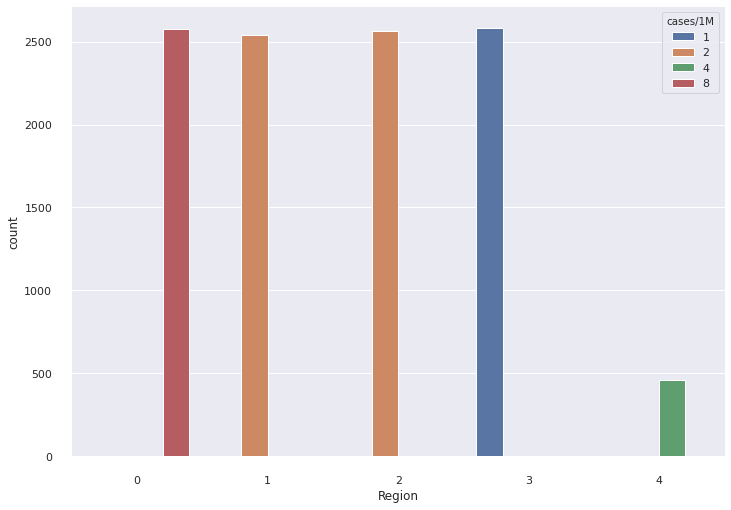

In [18]:
# import the seaborn module
import seaborn as sns
# import the matplotlib module
import matplotlib.pyplot as plt
# set the background colour of the plot to white
sns.set(style="whitegrid", color_codes=True)
# setting the plot size for all plots
sns.set(rc={'figure.figsize':(11.7,8.27)})
# create a countplot
sns.countplot('Region',data=data_clean,hue = 'cases/1M')
# Remove the top and down margin
sns.despine(offset=10, trim=True)
# display the plotplt.show()

In [0]:
YT= ['Infect_Prob']

In [0]:
XT=['Region','Gender','Married','Children','Occupation','Mode_transport','cases/1M','Deaths/1M','comorbidity','Age','Coma score','Pulmonary score','cardiological pressure','Diuresis','Platelets','HBB','d-dimer','Heart rate','HDL cholesterol','Charlson Index','Blood Glucose','FT/month']

In [0]:
X = data_clean[XT]
Y = data_clean[YT]

In [0]:
#import the necessary module
from sklearn.model_selection import train_test_split
#split data set into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.30, random_state = 10)

# DataPipeline

In [23]:
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D,Conv2D, MaxPooling1D, AveragePooling1D, GlobalAveragePooling1D, MaxPooling2D, GlobalMaxPooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix
from keras.models import *
from keras.layers import *
from keras.callbacks import *
from keras.callbacks import Callback, TensorBoard, EarlyStopping

Using TensorFlow backend.


In [0]:
# Build Our Neural Network Model
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
from keras import backend as K

def r2_score(y_true,y_pred):
    num = K.sum(K.square(y_true-y_pred))
    denom = K.sum(K.square(y_true- K.mean(y_true)))
    return (1-num/denom)

def getModel():
    model = Sequential()
    model.add(Dense(128,activation='relu',input_shape=(22,)))
    model.add(Dense(64,activation='relu',input_shape=(22,)))
    model.add(Dense(32,activation='relu'))
    model.add(Dense(16,activation='relu'))
    model.add(Dense(8,activation='relu'))
    model.add(Dense(1))
    
    model.compile(optimizer='adam',loss='mse',metrics=[r2_score])
    return model


In [25]:
model = getModel()
model.summary()





Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               2944      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 9         
Total params: 13,953
Trainable params: 13,953
Non-trainable params: 0
______________________________________________

In [37]:
hist = model.fit(X_train,Y_train,epochs=30,validation_data=(X_test,Y_test),verbose=1)

Train on 7499 samples, validate on 3215 samples
Epoch 1/30
7499/7499 [==============================] - 0s 53us/step - loss: 94.5658 - r2_score: 0.0170 - val_loss: 96.4757 - val_r2_score: 0.0506
Epoch 2/30
7499/7499 [==============================] - 0s 53us/step - loss: 95.2036 - r2_score: -0.0154 - val_loss: 99.6430 - val_r2_score: 0.0073
Epoch 3/30
7499/7499 [==============================] - 0s 53us/step - loss: 93.1020 - r2_score: 0.0657 - val_loss: 96.8866 - val_r2_score: -0.0519
Epoch 4/30
7499/7499 [==============================] - 0s 53us/step - loss: 94.4969 - r2_score: 0.0120 - val_loss: 107.4799 - val_r2_score: -0.1731
Epoch 5/30
7499/7499 [==============================] - 0s 57us/step - loss: 93.6532 - r2_score: 0.0341 - val_loss: 98.6497 - val_r2_score: 0.0467
Epoch 6/30
7499/7499 [==============================] - 0s 54us/step - loss: 92.2558 - r2_score: 0.0729 - val_loss: 100.6643 - val_r2_score: -0.0975
Epoch 7/30
7499/7499 [==============================] - 0s 54us/

In [38]:
r2_score = model.evaluate(X_test,Y_test)[1]
print(r2_score)

3215/3215 [==============================] - 0s 20us/step
0.014917324379109668


In [0]:
val_loss = hist.history['val_loss']
train_loss = hist.history['loss']

In [0]:
r2_score_train = hist.history['r2_score']
r2_score_val = hist.history['val_r2_score']

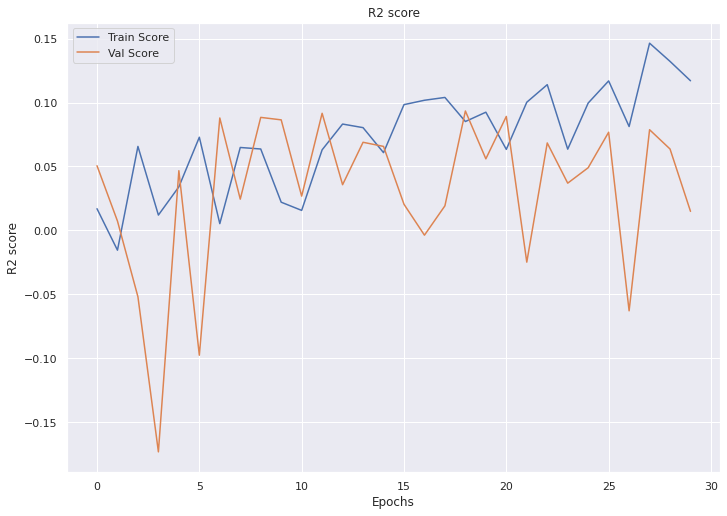

In [43]:
plt.plot(r2_score_train,label="Train Score")
plt.plot(r2_score_val,label="Val Score")
plt.legend()
plt.title("R2 score")
plt.xlabel("Epochs")
plt.ylabel("R2 score")
plt.show()

In [0]:
y_pred=model.predict(X_test)

In [48]:
Y_test[:20]

,Infect_Prob
9608,53.495323
4512,47.999307
6105,90.797760
8219,48.284109
5871,47.901891
3706,48.871053
10270,57.662462
651,77.129280
6579,46.187543
5524,46.791737


In [0]:
y = pd.DataFrame( y_pred)

In [50]:
y[:20]

,0
0,52.645294
1,47.746620
2,61.182220
3,43.550617
4,44.686504
5,45.955666
6,50.019016
7,64.493141
8,43.460617
9,43.105518


In [0]:
people_ID=test_data.people_ID

# Getting the test file and using label encoder on it

In [0]:
test_data=test_data.drop(columns_to_drop,axis=1)

In [0]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

test_data["Gender"] = le.fit_transform(test_data["Gender"])
test_data["Region"] = le.fit_transform(test_data["Region"])
test_data["Married"] = le.fit_transform(test_data["Married"])
test_data["Occupation"] = le.fit_transform(test_data["Occupation"])
test_data["Mode_transport"] = le.fit_transform(test_data["Mode_transport"])
test_data["comorbidity"] = le.fit_transform(test_data["comorbidity"])
test_data["Pulmonary score"] = le.fit_transform(test_data["Pulmonary score"])
test_data["cardiological pressure"] = le.fit_transform(test_data["cardiological pressure"])

In [0]:
preds = model.predict(test_data.values)

In [0]:
preds_data = pd.DataFrame(data=preds, columns=['Infect_prob'])

# convert to csv file

In [0]:
result = pd.concat([people_ID, preds_data], axis=1)

In [0]:
result.to_csv('infect_prob.csv', index=False)